## **3.3.0 -  Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p '/content/drive/MyDrive/PRNN Assignment 2/kuzushiji_mnist'

In [ ]:
import requests

try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x, total, unit: x  # If tqdm doesn't exist, replace it with a function that does nothing
    print('**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****')

# Python2 compatibility
try:
    input = raw_input
except NameError:
    pass

download_dict = {
    '1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)': {
        '1) MNIST data format (ubyte.gz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'],
        '2) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'],
    },
    '2) Kuzushiji-49 (49 classes, 28x28, 270k examples)': {
        '1) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
    },
    '3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)': {
        '1) Folders of images (.tar)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar'],
    }

}

# Download a list of files
def download_list(url_list):
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))

            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
    print('All dataset files downloaded!')

# Ask the user about which path to take down the dict
def traverse_dict(d):
    print('Please select a download option:')
    keys = sorted(d.keys())  # Print download options
    for key in keys:
        print(key)

    userinput = input('> ').strip()

    try:
        selection = int(userinput) - 1
    except ValueError:
        print('Your selection was not valid')
        traverse_dict(d)  # Try again if input was not valid
        return

    selected = keys[selection]

    next_level = d[selected]
    if isinstance(next_level, list):  # If we've hit a list of downloads, download that list
        download_list(next_level)
    else:
        traverse_dict(next_level)     # Otherwise, repeat with the next level

traverse_dict(download_dict)

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 2


100%|██████████| 17954/17954 [00:15<00:00, 1135.21KB/s]


100%|██████████| 30/30 [00:00<00:00, 135.90KB/s]


100%|██████████| 3008/3008 [00:04<00:00, 612.44KB/s]


100%|██████████| 6/6 [00:00<00:00, 5608.61KB/s]

All dataset files downloaded!


In [ ]:
!mv *.npz '/content/drive/MyDrive/PRNN Assignment 2/kuzushiji_mnist'

In [ ]:
import numpy as np
# Load the training data
train_images = np.load('/content/drive/MyDrive/PRNN Assignment 2/kuzushiji_mnist/kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('/content/drive/MyDrive/PRNN Assignment 2/kuzushiji_mnist/kmnist-train-labels.npz')['arr_0']

# Load the test data
test_images = np.load('/content/drive/MyDrive/PRNN Assignment 2/kuzushiji_mnist/kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('/content/drive/MyDrive/PRNN Assignment 2/kuzushiji_mnist/kmnist-test-labels.npz')['arr_0']

# Preprocess the data
train_images = train_images.reshape((len(train_images), 28, 28, 1)) / 255.0
test_images = test_images.reshape((len(test_images), 28, 28, 1)) / 255.0

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


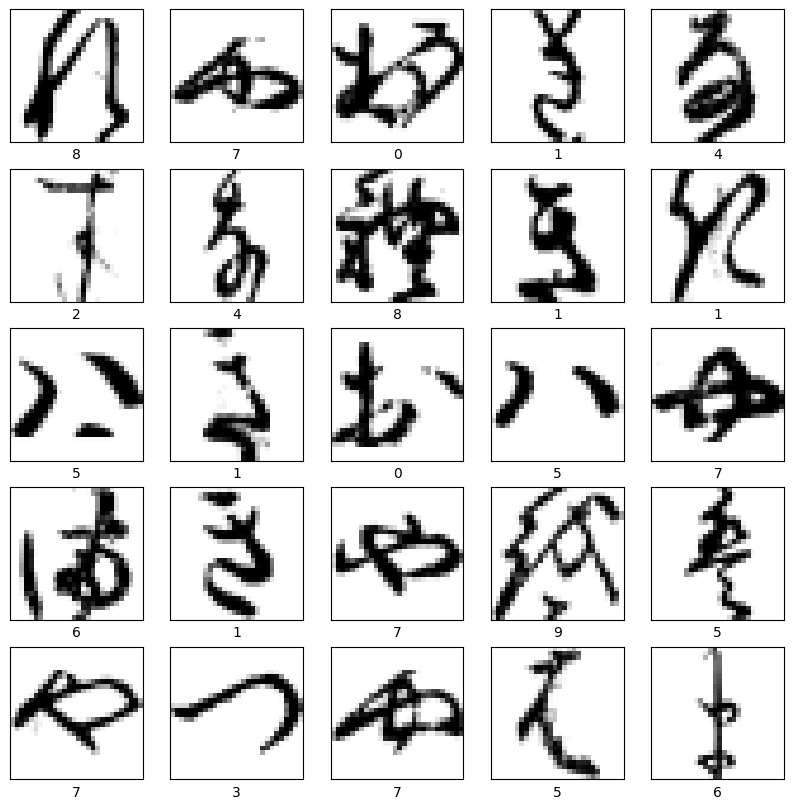

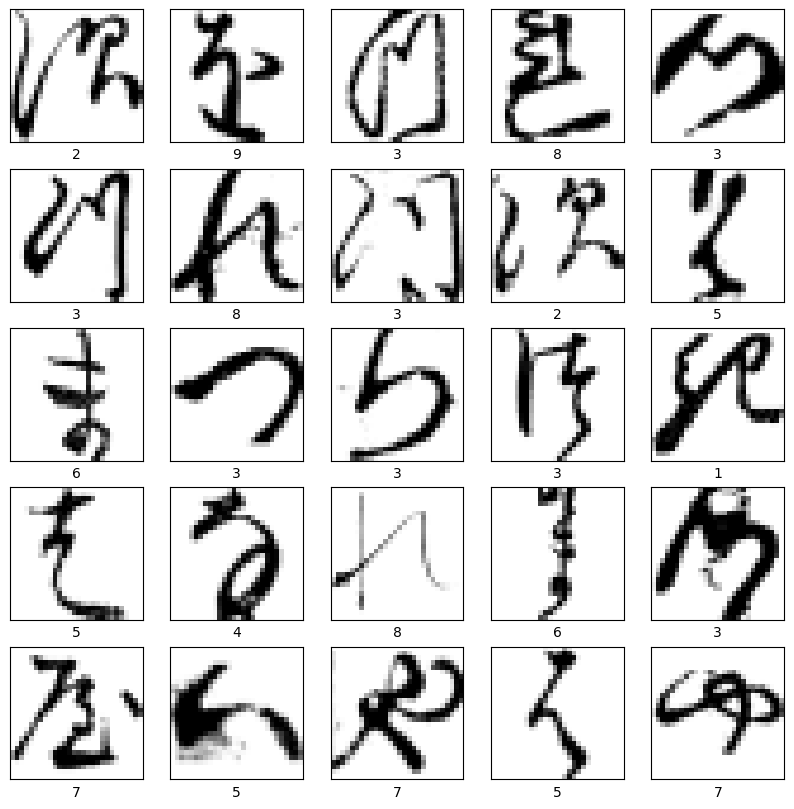

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Print debug statements
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Display a random sample of images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Display a random sample of images from the test dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

In [ ]:
import numpy as np

# Flatten the training and test images
train_images_flat = train_images.reshape((len(train_images), -1))
test_images_flat = test_images.reshape((len(test_images), -1))

# Debug print statements
print("Flattened training images shape:", train_images_flat.shape)
print("Flattened test images shape:", test_images_flat.shape)

# Normalize the pixel values
train_images_norm = train_images_flat / 255.0
test_images_norm = test_images_flat / 255.0

# Debug print statements
print("Normalized training images shape:", train_images_norm.shape)
print("Normalized test images shape:", test_images_norm.shape)
print("Normalized training images min/max values:", np.min(train_images_norm), np.max(train_images_norm))
print("Normalized test images min/max values:", np.min(test_images_norm), np.max(test_images_norm))

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(train_labels))
train_labels_onehot = np.eye(num_classes)[train_labels]
test_labels_onehot = np.eye(num_classes)[test_labels]

# Debug print statements
print("Number of classes:", num_classes)
print("One-hot encoded training labels shape:", train_labels_onehot.shape)
print("One-hot encoded test labels shape:", test_labels_onehot.shape)

Flattened training images shape: (60000, 784)
Flattened test images shape: (10000, 784)
Normalized training images shape: (60000, 784)
Normalized test images shape: (10000, 784)
Normalized training images min/max values: 0.0 0.00392156862745098
Normalized test images min/max values: 0.0 0.00392156862745098
Number of classes: 10
One-hot encoded training labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)


## **3.3.1 -  Logistic Regression**

**Model initialization**

In [ ]:
# Initialize the model parameters
input_size = train_images_flat.shape[1]  # Number of input features (784)
output_size = num_classes  # Number of output classes (10)

# Initialize weights with random values
weights = np.random.randn(input_size, output_size)

# Initialize bias with zeros
bias = np.zeros(output_size)

# Debug print statements
print("Input size:", input_size)
print("Output size:", output_size)
print("Weights shape:", weights.shape)
print("Bias shape:", bias.shape)

Input size: 784
Output size: 10
Weights shape: (784, 10)
Bias shape: (10,)


**Model Training**

Epoch [10/100], Loss: 26.3160
Epoch [20/100], Loss: 23.9143
Epoch [30/100], Loss: 13.5788
Epoch [40/100], Loss: 13.2094
Epoch [50/100], Loss: 11.7675
Epoch [60/100], Loss: 15.0201
Epoch [70/100], Loss: 12.9127
Epoch [80/100], Loss: 13.8556
Epoch [90/100], Loss: 13.2601
Epoch [100/100], Loss: 13.5316


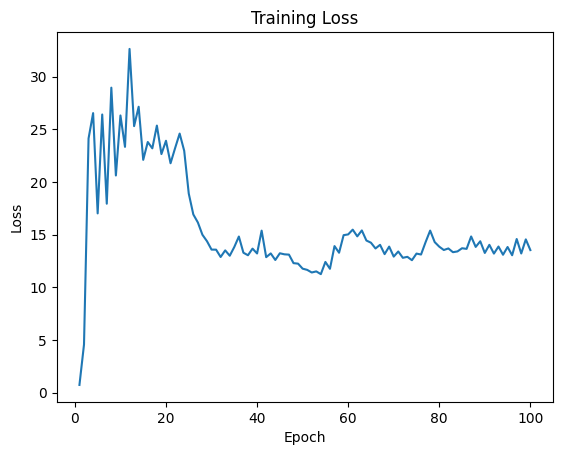

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    x = np.clip(x, -100, 100)  # Clip the input to the range [-100, 100]
    return 1 / (1 + np.exp(-x))

def cross_entropy_loss(predicted_probabilities, true_labels):
    epsilon = 1e-7
    predicted_probabilities = np.clip(predicted_probabilities, epsilon, 1 - epsilon)
    loss = -np.sum(true_labels * np.log(predicted_probabilities))
    return loss / true_labels.shape[0]

# Initialize the model parameters
input_size = train_images_flat.shape[1]
output_size = num_classes

weights = np.random.randn(input_size, output_size) * 0.01
bias = np.zeros(output_size)

train_images_norm = (train_images_flat - np.mean(train_images_flat, axis=0)) / np.std(train_images_flat, axis=0)
test_images_norm = (test_images_flat - np.mean(test_images_flat, axis=0)) / np.std(test_images_flat, axis=0)

# Training loop
num_epochs = 100  # Increase the number of epochs
learning_rate = 0.0001  # Reduce the learning rate
regularization_lambda = 0.01
losses = []

for epoch in range(num_epochs):
    # Forward propagation
    linear_output = np.dot(train_images_norm, weights) + bias
    predicted_probabilities = sigmoid(linear_output)

    # Loss calculation
    loss = cross_entropy_loss(predicted_probabilities, train_labels_onehot)
    loss += regularization_lambda * np.sum(weights ** 2)

    # Backward propagation
    error = predicted_probabilities - train_labels_onehot
    gradients_weights = np.dot(train_images_norm.T, error) + 2 * regularization_lambda * weights
    gradients_bias = np.sum(error, axis=0)

    # Parameter updates
    weights -= learning_rate * gradients_weights
    bias -= learning_rate * gradients_bias

    losses.append(loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}")

plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

**Testing**

In [ ]:
# Test the model
test_linear_output = np.dot(test_images_norm, weights) + bias
test_predicted_probabilities = sigmoid(test_linear_output)
test_predicted_labels = np.argmax(test_predicted_probabilities, axis=1)

# Calculate accuracy
accuracy = np.mean(test_predicted_labels == test_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6004


## **3.3.2 -   SVM with the Gaussian Kernel**

In [ ]:
import numpy as np

# Flatten the training and test images
train_images_flat = train_images.reshape((len(train_images), -1))
test_images_flat = test_images.reshape((len(test_images), -1))

# Debug print statements
print("Flattened training images shape:", train_images_flat.shape)
print("Flattened test images shape:", test_images_flat.shape)

# Normalize the pixel values
train_images_norm = train_images_flat / 255.0
test_images_norm = test_images_flat / 255.0

# Debug print statements
print("Normalized training images shape:", train_images_norm.shape)
print("Normalized test images shape:", test_images_norm.shape)
print("Normalized training images min/max values:", np.min(train_images_norm), np.max(train_images_norm))
print("Normalized test images min/max values:", np.min(test_images_norm), np.max(test_images_norm))

# Convert labels to integer labels
train_labels_int = np.argmax(train_labels_onehot, axis=1)
test_labels_int = np.argmax(test_labels_onehot, axis=1)

# Debug print statements
print("Integer training labels shape:", train_labels_int.shape)
print("Integer test labels shape:", test_labels_int.shape)
print("Unique labels:", np.unique(train_labels_int))

Flattened training images shape: (60000, 784)
Flattened test images shape: (10000, 784)
Normalized training images shape: (60000, 784)
Normalized test images shape: (10000, 784)
Normalized training images min/max values: 0.0 0.00392156862745098
Normalized test images min/max values: 0.0 0.00392156862745098
Integer training labels shape: (60000,)
Integer test labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Hyperparameter Initialization
C = 1.0  # Regularization parameter
gamma = 0.1  # Kernel coefficient

# Debug print statements
print("Regularization parameter (C):", C)
print("Kernel coefficient (gamma):", gamma)

Regularization parameter (C): 1.0
Kernel coefficient (gamma): 0.1


In [ ]:
def gaussian_kernel(x1, x2, gamma):
    """
    Gaussian kernel function.

    Args:
        x1 (numpy.ndarray): First data point.
        x2 (numpy.ndarray): Second data point.
        gamma (float): Kernel coefficient.

    Returns:
        float: Kernel value.
    """
    return np.exp(-gamma * np.sum((x1 - x2) ** 2))

# Debug print statements
x1 = train_images_norm[0]  # Example data point 1
x2 = train_images_norm[1]  # Example data point 2
kernel_value = gaussian_kernel(x1, x2, gamma)
print("Example kernel value:", kernel_value)

Example kernel value: 0.9997086556299104


In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_function(alpha, kernel_matrix, labels):
    """
    Objective function for SVM optimization.

    Args:
        alpha (numpy.ndarray): Lagrange multipliers.
        kernel_matrix (numpy.ndarray): Kernel matrix.
        labels (numpy.ndarray): Labels.

    Returns:
        float: Negative of the dual objective function.
    """
    alpha_labels = alpha * labels
    return 0.5 * np.sum(np.outer(alpha_labels, alpha_labels) * kernel_matrix) - np.sum(alpha)

def constraint(alpha, labels):
    """
    Constraint function for SVM optimization.

    Args:
        alpha (numpy.ndarray): Lagrange multipliers.
        labels (numpy.ndarray): Labels.

    Returns:
        float: Constraint value.
    """
    return np.sum(alpha * labels)

# Take a larger subset of the training data with all classes
subset_size = 100
random_indices = np.random.choice(len(train_images_norm), subset_size, replace=False)
train_images_subset = train_images_norm[random_indices]
train_labels_subset = train_labels_int[random_indices]

# Train multiple SVM models using OvR approach
num_classes = len(np.unique(train_labels_int))
svm_models = []

for class_label in range(num_classes):
    print(f"Training SVM model for class {class_label}")

    # Create binary labels for the current class (-1 for other classes, 1 for the current class)
    binary_labels = np.where(train_labels_subset == class_label, 1, -1)

    # Calculate the kernel matrix
    kernel_matrix = np.zeros((subset_size, subset_size))
    for i in range(subset_size):
        for j in range(subset_size):
            kernel_matrix[i, j] = gaussian_kernel(train_images_subset[i], train_images_subset[j], gamma)

    # Set up the optimization problem
    n_samples = subset_size
    alpha_init = np.zeros(n_samples)
    bounds = [(0, C)] * n_samples
    constraints = ({'type': 'eq', 'fun': constraint, 'args': (binary_labels,)},)

    # Solve the optimization problem
    optimize_result = minimize(objective_function, alpha_init, args=(kernel_matrix, binary_labels),
                               method='SLSQP', bounds=bounds, constraints=constraints)

    alpha_opt = optimize_result.x
    support_vectors_indices = np.where(alpha_opt > 1e-5)[0]
    support_vectors = train_images_subset[support_vectors_indices]
    support_vector_labels = binary_labels[support_vectors_indices]
    alpha_opt_sv = alpha_opt[support_vectors_indices]

    # Calculate the bias term
    bias = np.mean([1 - np.sum(alpha_opt_sv * support_vector_labels * kernel_matrix[support_vectors_indices, i])
                    for i in support_vectors_indices])

    svm_models.append((support_vectors, support_vector_labels, alpha_opt_sv, bias))

print("SVM models trained for all classes.")

Training SVM model for class 0
Training SVM model for class 1
Training SVM model for class 2
Training SVM model for class 3
Training SVM model for class 4
Training SVM model for class 5
Training SVM model for class 6
Training SVM model for class 7
Training SVM model for class 8
Training SVM model for class 9
SVM models trained for all classes.


In [ ]:
# Print parameters of the trained SVM models
for class_label, svm_model in enumerate(svm_models):
    support_vectors, support_vector_labels, alpha_opt_sv, bias = svm_model

    print(f"\nSVM model for class {class_label}:")
    print("Support vectors:")
    print(support_vectors)

    print("\nSupport vector labels:")
    print(support_vector_labels)

    print("\nOptimized Lagrange multipliers (alpha) for support vectors:")
    print(alpha_opt_sv)

    print("\nBias term:")
    print(bias)


SVM model for class 0:
Support vectors:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Support vector labels:
[-1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1
 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1  1 -1]

Optimized Lagrange multipliers (alpha) for support vectors:
[1.32457823e-01 1.53888752e-01 6.60016174e-03 1.00000000e+00
 8.73237495e-02 3.12746734e-01 1.58961494e-03 1.00000000e+00
 1.00000000e+00 1.85456907e-04 8.83343109e-01 6.09591044e-01
 6.53400117e-02 1.96882703e-02 6.73672710e-03 7.97376062e-02
 1.00000000e+00 6.15906145e-02 1.00000000e+00 1.15635283e-01
 1.44172696e-02 1.00000000e+00 8.27470870e-01 1.00000000e+00
 5.52631005e-01 3.40421620e-01 1.19372728e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 2.27266585e-04 6.89988022e-01
 9.72901061e-03 2.08840820e-01 1.00000000e+00 2.24007967e-

**Testing**

In [ ]:
import numpy as np

def predict_class(svm_models, x):
    """
    Predict the class label for a given data point using the trained SVM models.

    Args:
        svm_models (list): List of trained SVM models for each class.
        x (numpy.ndarray): Input data point.

    Returns:
        int: Predicted class label.
    """
    decision_values = []

    for svm_model in svm_models:
        support_vectors, support_vector_labels, alpha_opt_sv, bias = svm_model

        # Calculate the decision value for the current SVM model
        decision_value = np.sum(alpha_opt_sv * support_vector_labels * np.array([gaussian_kernel(x, sv, gamma) for sv in support_vectors])) + bias
        decision_values.append(decision_value)

    # Find the class(es) with the highest decision value(s)
    max_decision_value = np.max(decision_values)
    predicted_classes = np.where(decision_values == max_decision_value)[0]

    # If there is a tie, randomly select one of the tied classes
    if len(predicted_classes) > 1:
        predicted_class = np.random.choice(predicted_classes)
    else:
        predicted_class = predicted_classes[0]

    return predicted_class

# Predict the class labels for the test dataset
predicted_labels = []

for x_test in test_images_norm:
    predicted_class = predict_class(svm_models, x_test)
    predicted_labels.append(predicted_class)

predicted_labels = np.array(predicted_labels)

# Calculate the accuracy of the SVM model on the test dataset
accuracy = np.mean(predicted_labels == test_labels_int)
print(f"Accuracy on the test dataset: {accuracy:.4f}")

Accuracy on the test dataset: 0.4220


## **3.3.3 -   MLP**

In [ ]:
import numpy as np

# Assuming you have already loaded the Kuzushiji-MNIST dataset and have the following variables:
# - train_images_norm: Normalized training images
# - train_labels_int: Integer-encoded training labels
# - test_images_norm: Normalized test images
# - test_labels_int: Integer-encoded test labels

# Convert labels to one-hot encoding
num_classes = len(np.unique(train_labels_int))
train_labels_onehot = np.eye(num_classes)[train_labels_int]
test_labels_onehot = np.eye(num_classes)[test_labels_int]

# Print dataset information
print("Training data shape:", train_images_norm.shape)
print("Training labels shape:", train_labels_onehot.shape)
print("Testing data shape:", test_images_norm.shape)
print("Testing labels shape:", test_labels_onehot.shape)


Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 10)


In [ ]:
# Model Initialization
input_size = train_images_norm.shape[1]  # Number of features (pixels) in each image
output_size = num_classes  # Number of classes (10 for Kuzushiji-MNIST)
hidden_layers = [256]
loss_function = 'crossentropy'  # Loss function for classification
learning_rate = 0.1  # Learning rate for the optimizer
l2_reg = 0.001  # L2 regularization strength

model = FullyConnectedNeuralNetwork(input_size, output_size, hidden_layers, loss_function, learning_rate, l2_reg=l2_reg)

print("Model initialized.")
print("Model architecture:")
print("Input size:", model.input_size)
print("Output size:", model.output_size)
print("Hidden layers:", model.hidden_layers)

Model initialized.
Model architecture:
Input size: 784
Output size: 10
Hidden layers: [256]


In [ ]:
# Training Loop
num_epochs = 50  # Number of epochs (iterations over the entire training set)
batch_size = 50  # Number of samples per batch

num_batches = len(train_images_norm) // batch_size
train_loss_history = []

for epoch in range(num_epochs):
    epoch_loss = 0.0

    # Shuffle the training data at the start of each epoch
    permutation = np.random.permutation(len(train_images_norm))
    train_images_norm = train_images_norm[permutation]
    train_labels_onehot = train_labels_onehot[permutation]

    for batch in range(num_batches):
        # Extract the current batch
        start_index = batch * batch_size
        end_index = (batch + 1) * batch_size
        batch_images = train_images_norm[start_index:end_index]
        batch_labels = train_labels_onehot[start_index:end_index]

        # Forward pass
        outputs, activations = model.forward_pass(batch_images)

        # Compute loss
        loss = model.compute_loss(outputs, batch_labels)
        epoch_loss += loss

        # Backpropagation
        model.backpropagate(batch_images, batch_labels, activations)

    # Print the average loss for the epoch
    epoch_loss /= num_batches
    train_loss_history.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/50], Loss: 2.3033
Epoch [2/50], Loss: 2.3032
Epoch [3/50], Loss: 2.3030
Epoch [4/50], Loss: 2.3030
Epoch [5/50], Loss: 2.3027
Epoch [6/50], Loss: 2.3022
Epoch [7/50], Loss: 2.3014
Epoch [8/50], Loss: 2.2999
Epoch [9/50], Loss: 2.2970
Epoch [10/50], Loss: 2.2919
Epoch [11/50], Loss: 2.2829
Epoch [12/50], Loss: 2.2671
Epoch [13/50], Loss: 2.2410
Epoch [14/50], Loss: 2.2021
Epoch [15/50], Loss: 2.1505
Epoch [16/50], Loss: 2.0959
Epoch [17/50], Loss: 2.0444
Epoch [18/50], Loss: 2.0012
Epoch [19/50], Loss: 1.9645
Epoch [20/50], Loss: 1.9300
Epoch [21/50], Loss: 1.9019
Epoch [22/50], Loss: 1.8708
Epoch [23/50], Loss: 1.8369
Epoch [24/50], Loss: 1.7986
Epoch [25/50], Loss: 1.7564
Epoch [26/50], Loss: 1.7123
Epoch [27/50], Loss: 1.6717
Epoch [28/50], Loss: 1.6244
Epoch [29/50], Loss: 1.5788
Epoch [30/50], Loss: 1.5476
Epoch [31/50], Loss: 1.5034
Epoch [32/50], Loss: 1.4646
Epoch [33/50], Loss: 1.4330
Epoch [34/50], Loss: 1.4072
Epoch [35/50], Loss: 1.3763
Epoch [36/50], Loss: 1.3508
E

**Testing**

In [ ]:
# Model Evaluation
test_outputs, _ = model.forward_pass(test_images_norm)
test_predictions = np.argmax(test_outputs, axis=1)
test_labels = np.argmax(test_labels_onehot, axis=1)

accuracy = np.mean(test_predictions == test_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.4696
